In [1]:
library(Deriv)

Warning message:
“package ‘Deriv’ was built under R version 3.6.3”

In [2]:
set.seed(2021)

In [3]:
n <- 100
betas <- matrix(rbeta(n,5,2))

In [4]:
betas[1:5]

[1] 0.7383802 0.5895133 0.6386105 0.6360552 0.9582360

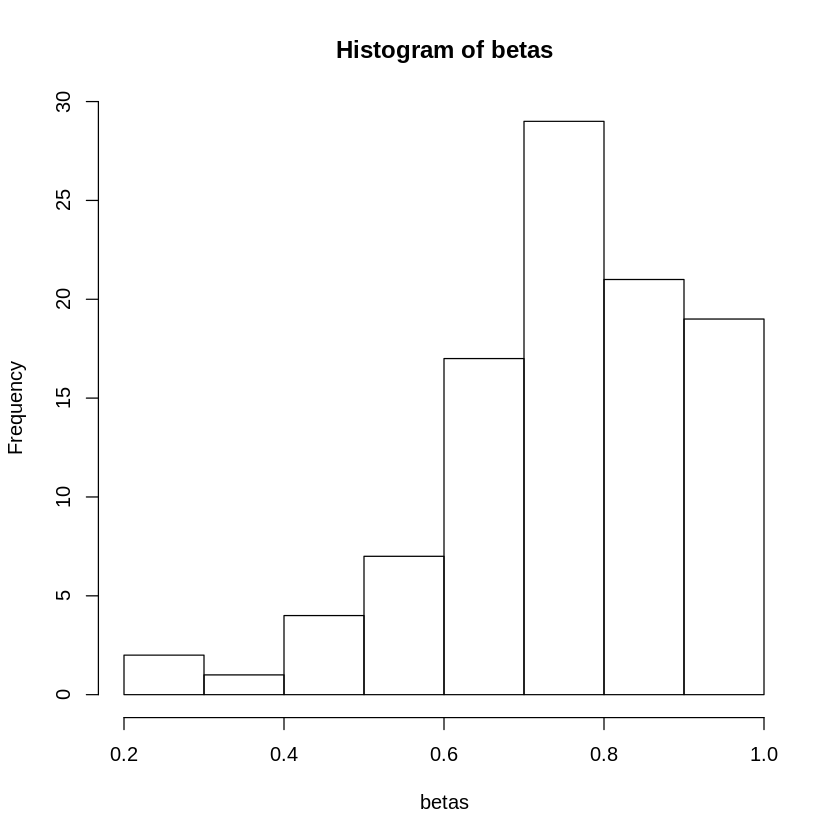

In [5]:
hist(betas)

In [6]:
dim(betas)

[1] 100   1

In [7]:
sal <- function(a,b,c,d,y){
    a + b*sinh(c*asinh(y) + d)
    }
# sal = expression(a + b*sinh(c*asinh(y)+d))

In [8]:
cov_kernel <- function(gamma,x){
    exp(-gamma*abs(x))
}

In [9]:
drule[["asinh"]] <- alist(x=1/sqrt(x^2+1))

d_sal = Deriv(sal,"y")

In [10]:
# negative log likelihood function
# https://stackoverflow.com/questions/20479315/optim-function-argument-missing
# x = phi_y
# https://upura.hatenablog.com/entry/2018/01/22/003429
# https://en.wikipedia.org/wiki/Sample_mean_and_covariance
# REML https://stats.stackexchange.com/questions/214676/restricted-maximum-likelihood-reml-estimate-of-variance-component
nllf <- function(v){
    a <- v[1]
    b <- v[2]
    c <- v[3]
    d <- v[4]
    gamma <- v[5]
    
    phi_y <- sal(a,b,c,d,betas)
    mu_x <- 0
    cov_xx <- cov_kernel(1,log(exp((phi_y-mu_x)) %*% exp(-t(phi_y-mu_x))))
    gaussian_params <- 0.5* t(phi_y-mu_x) %*% solve(cov_xx) %*% (phi_y-mu_x)
    
    return(0.5*log(det(cov_xx)) + gaussian_params - sum(log(d_sal(a,b,c,d,betas))))
    }


In [11]:
d_sal

function (a, b, c, d, y) 
b * c * cosh(c * asinh(y) + d)/sqrt(1 + y^2)

In [12]:
runif(5,min=1,max=10)

[1] 7.129941 1.306655 9.292023 4.092377 5.802314

In [13]:
#log likelihood
# L = -1/2log|C|-1/2(y-\mu)C^{-1}(y-\mu)+\sum log \partial \phi(yi)/\partial yi - N/2 log2\pi

In [15]:
o = optim(par=c(0.6,0.7,0.5,0.2,1),fn=nllf,method="L-BFGS-B")
o

$par
[1] -4.89292360  0.09181499  4.18574568  1.62864788  1.00000000

$value
[1] -365.3569

$counts
function gradient 
     136      136 

$convergence
[1] 0

$message
[1] "CONVERGENCE: REL_REDUCTION_OF_F <= FACTR*EPSMCH"

In [16]:
par = o$par

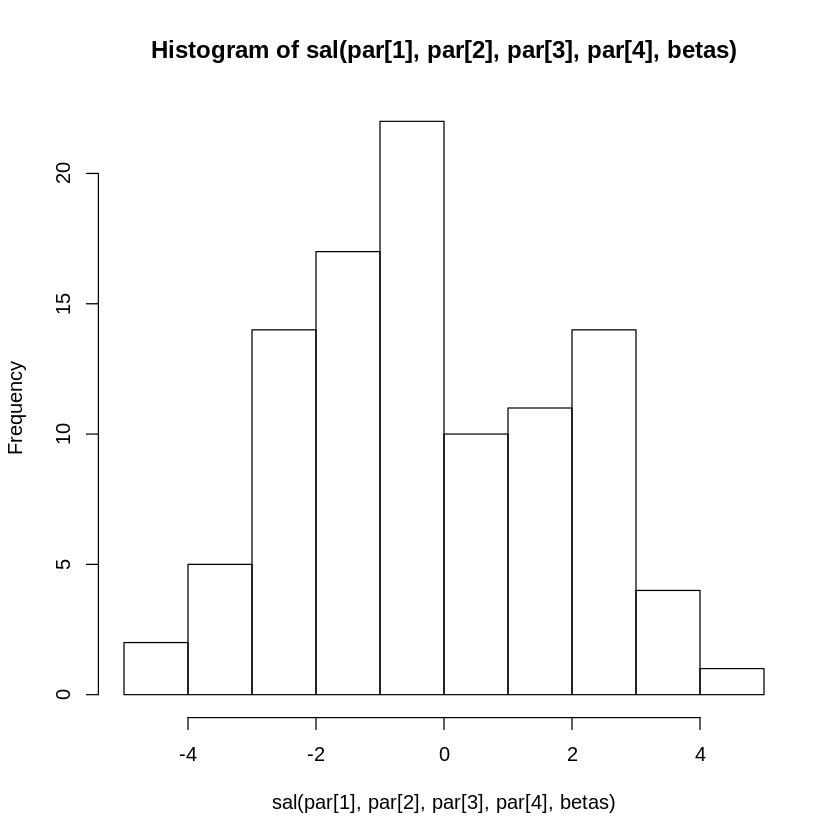

In [17]:
hist(sal(par[1],par[2],par[3],par[4],betas))